# Klasyfikacja w Pythonie

**zad. 1** Które z poniższych problemów jest problemem regresji, a które klasyfikacji?
 1. Sprawdzenie, czy wiadomość jest spamem.
 1. Przewidzenie oceny (od 1 do 5 gwiazdek) na podstawie komentarza.
 1. OCR cyfr: rozpoznanie cyfry z obrazka.
 
 Jeżeli problem jest klasyfikacyjny, to jakie mamy klasy?

## Miary dla klasyfikacji

Istnieje wieje miar (metryk), na podstawie których możemy ocenić jakość modelu. Podobnie jak w przypadku regresji liniowej potrzebne są dwie listy: lista poprawnych klas i lista predykcji z modelu. Najpopularniejszą z metryk jest trafność, którą definiuje się w następujący sposób:
 $$ACC = \frac{k}{N}$$ 
 $$SUM = \sum_{x}^{y}{k}{n}{i}$$
 
 gdzie: 
  * $k$  to liczba poprawnie zaklasyfikowanych przypadków,
  * $N$ liczebność zbioru testującego.

**zadanie** Napisz funkcję, która jako parametry przyjmnie dwie listy (lista poprawnych klas i wyjście z klasyfikatora) i zwróci trafność.

In [1]:
def accuracy_measure(true, predicted):
    if len(true_label) != len(predicted):
        raise ValueError("Input lists can't have different sizes.")
    
    correct_values = 0
    for i in range(len(true_label)):
        if true_label[i] == predicted[i]:
            correct_values += 1

    return correct_values / len(predicted)

true_label = [1, 1, 1, 0, 0]
predicted = [0, 1, 0, 1, 0]
print("ACC:", accuracy_measure(true_label, predicted))

ACC: 0.4


## Klasyfikator $k$ najbliższych sąsiadów *(ang. k-nearest neighbors, KNN)*

Klasyfikator [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), który został wprowadzony na ostatnim wykładzie, jest bardzo intuicyjny. Pomysł, który stoi za tym klasyfikatorem jest bardzo prosty: Jeżeli mamy nowy obiekt do zaklasyfikowania, to szukamy wśród danych trenujących $k$ najbardziej podobnych do niego przykładów i na ich podstawie decydujemy (np. biorąc większość) do jakie klasy powinien należeć dany obiekt.

** Przykład 1** Mamy za zadanie przydzielenie obiektów do dwóch klas: trójkątów lub kwadratów. Rozpatrywany obiekt jest zaznaczony zielonym kółkiem. Przyjmując $k=3$, mamy wśród sąsiadów 2 trójkąty i 1 kwadrat. Stąd obiekt powinienm zostać zaklasyfikowany jako trójkąt. Jak zmienia się sytuacja, gdy przyjmiemy $k=5$?

![Przykład 1](./KnnClassification.svg.png)

( Grafika pochodzi z https://pl.wikipedia.org/wiki/K_najbli%C5%BCszych_s%C4%85siad%C3%B3w )

## Herbal Iris

*Herbal Iris* jest klasycznym zbiorem danych w uczeniu maszynowym, który powstał w 1936 roku. Zawiera on informacje na 150 egzemplarzy roślin, które należą do jednej z 3 odmian.

**zad. 2** Wczytaj do zmiennej ``data`` zbiór *Herbal Iris*, który znajduje się w pliku ``iris.data``. Jest to plik csv.

Kolumny są następujące:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 
  * Iris Setosa
  * Iris Versicolour
  * Iris Virginica

In [7]:
import pandas as pd

df = pd.read_csv(
    './iris.data', 
    index_col=4, 
    names=[
        'Sepal length', 
        'Sepal width', 
        'Petal length', 
        'Petal width',
        'Class'
    ])
df

Sepal length  Sepal width  Petal length  Petal width
Class                                                               
Iris-setosa              5.1          3.5           1.4          0.2
Iris-setosa              4.9          3.0           1.4          0.2
Iris-setosa              4.7          3.2           1.3          0.2
Iris-setosa              4.6          3.1           1.5          0.2
Iris-setosa              5.0          3.6           1.4          0.2
...                      ...          ...           ...          ...
Iris-virginica           6.7          3.0           5.2          2.3
Iris-virginica           6.3          2.5           5.0          1.9
Iris-virginica           6.5          3.0           5.2          2.0
Iris-virginica           6.2          3.4           5.4          2.3
Iris-virginica           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

**zad. 3** Odpowiedz na poniższe pytania:
 1. Które atrybuty są wejściowe, a w której kolumnie znajduje się klasa wyjściowa?
 1. Ile jest różnych klas? Wypisz je ekran.
 1. Jaka jest średnia wartość w kolumnie ``sepal_length``? Jak zachowuje się średnia, jeżeli policzymy ją dla każdej z klas osobno?

In [20]:
import numpy as np

np.average(df['Sepal length'])
df.groupby('Class')['Sepal length'].mean()
len(df.index.drop_duplicates())


3

Wytrenujmy klasyfikator *KNN*, ale najpierw przygotujmy dane. Fukcja ``train_test_split`` dzieli zadany zbiór danych na dwie części. My wykorzystamy ją do podziału na zbiór treningowy (66%) i testowy (33%), służy do tego parametr ``test_size``.

In [25]:
from sklearn.model_selection import train_test_split

data = pd.read_csv(
    './iris.data', 
    names=[
        'sepal_length', 
        'sepal_width', 
        'petal_length', 
        'petal_width',
        'class'
    ])

X = data.loc[:, 'sepal_length':'petal_width']
Y = data['class']

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size=0.33, random_state=42)


Trenowanie klasyfikatora wygląda bardzo podobnie do treningi modelu regresji liniowej:

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_Y)


KNeighborsClassifier(n_neighbors=3)

Mając wytrenowany model możemy wykorzystać go do predykcji na zbiorze testowym.

In [27]:
predicted = model.predict(test_X)

for i in range(10):
    print("Zaklasyfikowane: {}, Orginalne: {}".format(predicted[i], test_Y.reset_index()['class'][i]))


Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-setosa, Orginalne: Iris-setosa
Zaklasyfikowane: Iris-virginica, Orginalne: Iris-virginica
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-setosa, Orginalne: Iris-setosa
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-virginica, Orginalne: Iris-virginica
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor


Możemy obliczyć *accuracy*:

In [28]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_Y, predicted))

0.98


**zad. 4** Wytrenuj nowy model ``model_2`` zmieniając liczbę sąsiadów na 20. Czy zmieniły się wyniki?

In [34]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20)
model.fit(train_X, train_Y)

from sklearn.metrics import accuracy_score

print(accuracy_score(test_Y, predicted))


0.98


**zad. 5**   Wytrenuj model z $k=1$. Przeprowadź walidację na zbiorze trenującym zamiast na zbiorze testowym? Jakie wyniki otrzymałeś? Czy jest to wyjątek? Dlaczego tak się dzieje?

In [40]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_X, train_Y)

predicted = model.predict(train_X)
from sklearn.metrics import accuracy_score

print(accuracy_score(train_Y, predicted))


1.0


## Walidacja krzyżowa

Zbiór *herbal Iris* jest bardzo małym zbiorem. Wydzielenie z niego zbioru testowego jest obciążone dużą wariancją wyników, tj. w zależności od sposoby wyboru zbioru testowego wyniki mogą się bardzo różnic. Żeby temu zaradzić, stosuje się algorytm [walidacji krzyżowej](https://en.wikipedia.org/wiki/Cross-validation_(statistics). Algorytm wygląda następująco:
 1. Podziel zbiór danych na $n$ części (losowo).
 1. Dla każdego i od 1 do $n$ wykonaj:
  1. Weź $i$-tą część jako zbiór testowy, pozostałe dane jako zbiór trenujący.
  1. Wytrenuj model na zbiorze trenującym.
  1. Uruchom model na danych testowych i zapisz wyniki.
 1. Ostateczne wyniki to średnia z $n$ wyników częściowych. 
 
 W Pythonie służy do tego funkcja ``cross_val_score``, która przyjmuje jako parametry (kolejno) model, zbiór X, zbiór Y. Możemy ustawić parametr ``cv``, który określa na ile części mamy podzielić zbiór danych oraz parametr ``scoring`` określający miarę.
 
 W poniższym przykładzie dzielimy zbiór danych na 10 części (10-krotna walidacja krzyżowa) i jako miarę ustawiany celność (ang. accuracy).

In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=k)
scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
print("Wynik walidacji krzyżowej:", scores.mean())

**zad. 6** Klasyfikator $k$ najbliższych sąsiadów posiada jeden parametr: $k$, który określa liczbę sąsiadów podczas klasyfikacji. Jak widzieliśmy, wybór $k$ może mieć duże znaczenie dla jakości klasyfikatora. Wykonaj:
 1. Stwórz listę ``neighbors`` wszystkich liczb nieparzystych od 1 do 50.
 1. Dla każdego elementu ``i`` z listy ``neighbors`` zbuduj klasyfikator *KNN* o liczbie sąsiadów równej ``i``. Nastepnie przeprowadz walidację krzyżową (parametry takie same jak powyżej) i zapisz wyniki do tablicy ``cv_scores``.
 1. Znajdź ``k``, dla którego klasyfikator osiąga najwyższy wynik.

In [55]:
from sklearn.model_selection import cross_val_score

neighbors = list(range(2,52,2))

cv_scores = list()

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_scores.append(cross_val_score(knn, X, Y, cv=10, scoring='accuracy').mean())

np.max(cv_scores)

    



0.9800000000000001

Wykres przedstawiający precent błedów w zależnosci od liczby sąsiadów.

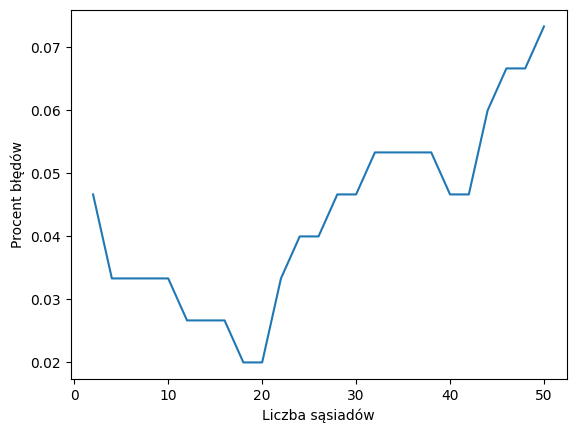

In [56]:
import matplotlib.pyplot as plt
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Liczba sąsiadów')
plt.ylabel('Procent błędów')
plt.show()

## TF IDF Vectorizer

Czasami, żeby wytrenować model nie da się zastosować bezpośrednio danego typu danych, ponieważ najczęściej wejściem do algorytmu ML jest wektor, macierz lub tensor.
Dane tekstowe musimy również przekształcić do wektorów. Przydatny w tym przypadku jest TF IDF Vectorizer.
Oto przyład z dokumentacji jak można z niego skorzystać (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)



In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X.shape)


(4, 9)


In [58]:
vectorizer.get_feature_names_out()


array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [59]:
X

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [60]:
X.todense()

matrix([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
         0.        , 0.38408524, 0.        , 0.38408524],
        [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
         0.53864762, 0.28108867, 0.        , 0.28108867],
        [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
         0.        , 0.26710379, 0.51184851, 0.26710379],
        [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
         0.        , 0.38408524, 0.        , 0.38408524]])

Na podstawie tych danych możemy wytrenowąc model regresji logistycznej. Jest to model regresji liniowej z dodatkową nałożoną funkcją logistyczną:
    ( https://en.wikipedia.org/wiki/Logistic_function )
    
    
![Przykład 1](./logistic.png)


Dzięki wyjściu modelu zawsze pomiędzy 0, a 1 można traktować wynik jako prawdopodobieństwo


In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
y = [0,0,1,1]
model = LogisticRegression()
model.fit(X, y)
model.predict(X)

array([0, 0, 1, 0])

In [63]:
model.predict_proba(X)

array([[0.51514316, 0.48485684],
       [0.56428483, 0.43571517],
       [0.40543928, 0.59456072],
       [0.51514316, 0.48485684]])

## Sieci neuronowe

Warto zauważyć, że sieci neuronowe w najprostszym wariancie to tak naprawdę złożenie wielu funkcji regresji logistycznej ze sobą, gdzie wejściem jednego modelu regresji logistycznej jest wyjście poprzedniej. W przypadku danych tekstowych zazwyczaj jest wybierana wtedy inna reprezentacja danych niż TF IDF, ponieważ TF IDF nie uwzględnia kolejności słów

## Standard Scaler

**Zadanie 7**


Sprawdź dokumentację https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

KNN jest wrażliwy na liniowe skalowanie danych (w przeciwieństwie do modeli bazujących na regresji, gdyż współczynniki liniowe rekompensują skalowanie liniowe).

Wytrenuj dowolny model KNN na cechach pozyskanych ze StandardScaler. Pamiętaj, żeby wyskalować zarówno dane ze zbioru test jak i train.



Zauważ, że scaler ma podobne API (fit, transform) jak TF IDF Vectorier

In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn 

df = pd.read_csv(
    './iris.data', 
    index_col=4, 
    names=[
        'Sepal length', 
        'Sepal width', 
        'Petal length', 
        'Petal width',
        'Class'
    ])
df

Sepal length  Sepal width  Petal length  Petal width
Class                                                               
Iris-setosa              5.1          3.5           1.4          0.2
Iris-setosa              4.9          3.0           1.4          0.2
Iris-setosa              4.7          3.2           1.3          0.2
Iris-setosa              4.6          3.1           1.5          0.2
Iris-setosa              5.0          3.6           1.4          0.2
...                      ...          ...           ...          ...
Iris-virginica           6.7          3.0           5.2          2.3
Iris-virginica           6.3          2.5           5.0          1.9
Iris-virginica           6.5          3.0           5.2          2.0
Iris-virginica           6.2          3.4           5.4          2.3
Iris-virginica           5.9          3.0           5.1          1.8

[150 rows x 4 columns]